## Pandas 入门

1. ‘Series’：数据系列，代表一维数据，较numpy中的一维数组更强大；
2. ‘DataFrame’：数据窗/数据框/数据表，代表二维数据，封装了数据分析常用的各种方法；
3. ‘Index’：索引，为Series和DataFrame提供数据索引服务。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg'

### 1.1 Series

可自定义索引，默认为0，1,2,3...

自定义索引后仍可使用默认索引，也可使用逆向索引

未自定义默认索引不允许使用逆向索引

In [3]:
# 创建Series对象
# 方式一
ser1 = pd.Series(data = [12,54,78,95],index = [f'{x}季度' for x in '一二三四'])
ser1

一季度    12
二季度    54
三季度    78
四季度    95
dtype: int64

In [4]:
ser1['一季度']

12

多条数据取出来仍为一个系列

In [5]:
ser1[ser1 >= 60]

三季度    78
四季度    95
dtype: int64

In [6]:
# 花式索引
ser1[['一季度','三季度']]

一季度    12
三季度    78
dtype: int64

In [7]:
# 方式二
ser2 = pd.Series(data={'一季度':253,'二季度':563,'三季度':193,'四季度':245})
ser2

一季度    253
二季度    563
三季度    193
四季度    245
dtype: int64

###### Series 属性

In [8]:
ser2.二季度

563

In [9]:
# ser2数据类型
ser2.dtype

dtype('int64')

In [10]:
# ser2类型
type(ser2)

pandas.core.series.Series

In [11]:
# ser2索引
ser2.index

Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')

In [12]:
# ser2值
ser2.values

array([253, 563, 193, 245], dtype=int64)

In [13]:
# ser2元素个数
ser2.size

4

In [14]:
# ser2元素是否唯一,True:唯一
ser2.is_unique

True

In [15]:
# ser2是否含有空值,False:不含有
ser2.hasnans

False

In [16]:
ser2.loc['二季度':'四季度']

二季度    563
三季度    193
四季度    245
dtype: int64

In [17]:
# ser2是否单调
ser2.is_monotonic

False

###### Series 方法

In [18]:
# 获取描述性统计信息   --->   集中趋势
print(ser2.sum())  #求和
print(ser2.mean())  #平均值
print(ser2.median())   #中位数
print(ser2.quantile())   # 中位数
print(ser2.mode())   #众数

1254
313.5
249.0
249.0
0    193
1    245
2    253
3    563
dtype: int64


In [19]:
# 获取描述性统计信息   --->   离散趋势
print(ser2.max())  #最大值
print(ser2.min())  #最小值
print(ser2.var())  #方差
print(ser2.std())  #标准差
print(ser2.quantile(0.25))  #下四分位数(0.25\0.5,0.75)默认为0.5

563
193
28374.333333333332
168.44682642701622
232.0


In [20]:
ser2.describe()

count      4.000000
mean     313.500000
std      168.446826
min      193.000000
25%      232.000000
50%      249.000000
75%      330.500000
max      563.000000
dtype: float64

In [21]:
ser3 = pd.Series(data=[1,2,5,9,5,9,1,6,4,1,9])
ser3

0     1
1     2
2     5
3     9
4     5
5     9
6     1
7     6
8     4
9     1
10    9
dtype: int64

In [22]:
# 去重   ---> ndarray
ser3.unique()

array([1, 2, 5, 9, 6, 4], dtype=int64)

In [23]:
# 不重复元素个数
ser3.nunique()

6

In [24]:
# 元素重复频次（按频次降序排列）
ser3.value_counts()

1    3
9    3
5    2
2    1
6    1
4    1
dtype: int64

In [25]:
# 删除重复元素 --->series(去重)
# 保留相同元素的第一个（默认）
ser3.drop_duplicates()

0    1
1    2
2    5
3    9
7    6
8    4
dtype: int64

In [26]:
# 去重  保留相同元素的最后一个
ser3.drop_duplicates(keep = 'last')

1     2
4     5
7     6
8     4
9     1
10    9
dtype: int64

In [27]:
# 去重  相同元素一个不留，只保留不同元素
ser3.drop_duplicates(keep = False)

1    2
7    6
8    4
dtype: int64

上面去重方法均未改变原数据系列(ser3)
想要在原数据系列做修改设置inplace = True

In [28]:
# inplace - 是否就地删除(改变ser3)
# True - 就地操作，不返回新对象   ---> None
# False(默认值) - 返回操作后的新对象   ---> Series
ser3.drop_duplicates(keep=False,inplace=True)
ser3

1    2
7    6
8    4
dtype: int64

In [29]:
ser4 = pd.Series(data=[10, 20, np.NaN, 30, np.NaN])
ser4

0    10.0
1    20.0
2     NaN
3    30.0
4     NaN
dtype: float64

In [30]:
# 删除指定索引数据，原数据系列不变
ser4.drop(index = [2,4])
# ser4.drop(index = 2)

0    10.0
1    20.0
3    30.0
dtype: float64

In [31]:
# 判断是否为空
ser4.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [32]:
# 删除空值
ser4.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [33]:
# 填充空值   指定值
ser4.fillna(50)

0    10.0
1    20.0
2    50.0
3    30.0
4    50.0
dtype: float64

In [34]:
# 填充空值   邻近的前面的值
ser4.fillna(method='ffill')

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64

In [35]:
# 填充空值   邻近的后面的值
ser4.fillna(method='bfill')

0    10.0
1    20.0
2    30.0
3    30.0
4     NaN
dtype: float64

In [36]:
# 填充空值   可使用级联操作
ser4.fillna(method='bfill').fillna(method='ffill')

0    10.0
1    20.0
2    30.0
3    30.0
4    30.0
dtype: float64

In [37]:
# 给索引(Unicode编码)排序
# ord('三') = 19977,ord('二') = 20108
# ascending - 升序/降序  默认为True(升序)
ser1.sort_index()

一季度    12
三季度    78
二季度    54
四季度    95
dtype: int64

In [38]:
# 值排序
ser1.sort_values(ascending=False)

四季度    95
三季度    78
二季度    54
一季度    12
dtype: int64

In [39]:
# Top - N 
ser1.nlargest(2)

四季度    95
三季度    78
dtype: int64

In [40]:
# Min - N 
ser1.nsmallest(2)

一季度    12
二季度    54
dtype: int64

In [41]:
ser5 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser5

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [42]:
# 格式化  na_action='ignore'忽略空值
ser5.map('I am a {}'.format,na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

In [43]:
ser6 = pd.Series(np.random.randint(30,80,10))
ser6

0    77
1    67
2    49
3    41
4    62
5    41
6    57
7    64
8    39
9    56
dtype: int32

In [44]:
def handle(score):
    return score ** 0.5 * 10

# map
np.round(ser6.map(handle),0)

0    88.0
1    82.0
2    70.0
3    64.0
4    79.0
5    64.0
6    75.0
7    80.0
8    62.0
9    75.0
dtype: float64

In [45]:
# 应用
np.round(ser6.apply(handle),0)

0    88.0
1    82.0
2    70.0
3    64.0
4    79.0
5    64.0
6    75.0
7    80.0
8    62.0
9    75.0
dtype: float64

In [46]:
ser1

一季度    12
二季度    54
三季度    78
四季度    95
dtype: int64

线性归一化：
$$
X' = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}
$$

零均值归一化(标准化)：
$$
X' = \frac{X_{i} - μ}{σ}
$$
其中 x 为某个特征的原始值， μ为该特征在所有样本中的平均值，σ 为该特征在所有样本中的标准差， X' 为经过标准化处理后的特征值 ~ N(0, 1)

In [47]:
# 线性归一化
ser1.map(lambda x: (x - ser1.min()) / (ser1.max() - ser1.min()))

一季度    0.000000
二季度    0.506024
三季度    0.795181
四季度    1.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

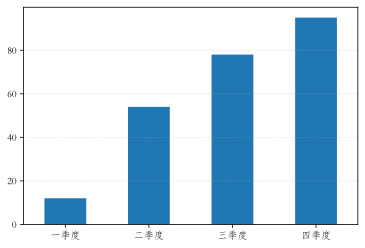

In [48]:
ser1.plot(kind = 'bar')
plt.xticks(rotation = 0)   # x坐标描述旋转0度
# 添加网格线
plt.grid(True,alpha = 0.5,axis = 'y',linestyle = ':')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

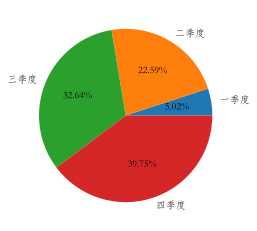

In [52]:
# 饼图
ser1.plot(kind = 'pie',autopct = '%.2f%%')  # 自动显示百分比。要显示百分号要写两个%%,第一个表示转义字符
plt.ylabel('')
plt.show

In [12]:
# 零均值归一化
temp_ser = ser1.map(lambda x: (x - ser1.mean()) / ser1.std())
# print(np.std(ser1))   # 总体标准偏差(计算结果/N)
# print(ser1.std())   # 样本标准偏差(计算结果/(N-1))
temp_ser

一季度   -1.326261
二季度   -0.159707
三季度    0.506896
四季度    0.979072
dtype: float64

In [15]:
print('均值：',temp_ser.mean())
print('标准差',temp_ser.std())

均值： 0.0
标准差 1.0


### 1.2 DataFrame

#### 1.2.1 创建DataFrame对象

In [17]:
# 第一种：通过二维数组创建DataFrame(参考基本使用文章分数例子)
# 第二种：通过字典创建DataFrame(参考Numpy高级使用波士顿房价)
# 第三种：读取CSV文件创建DataFrame
df = pd.read_csv('../files/data/订单.csv',encoding = 'utf-8')
df
# 参数设置
# sep = ''指定分隔符，默认为逗号；nrows = 20：控制读取行数
# skiprows = [5,6] - 跳过指定行  skiprows = range(1,11) - 跳过1-10行（0行是表头）

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
0,266170127728,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
1,254450690237,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
2,254450690237,swisse护肝片 澳洲,170,1,931177058999,NaN,NaN,NaN,卖家已发货，等待买家确认,931177058999
3,254406313174,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
4,254407814052,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
...,...,...,...,...,...,...,...,...,...,...
1827,235295148424,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,交易关闭,456026429338
1828,244853521870,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,交易成功,456026429338
1829,222644397061,澳洲swisse蔓越莓胶,175,1,931177059169,NaN,NaN,NaN,交易成功,931177059169
1830,235247255688,日本代购新谷酵素夜迟减肥,399,2,456026429338,NaN,NaN,NaN,交易成功,456026429338


In [3]:
# 取指定位置的指定行
temp_df = pd.read_csv('../files/data/订单.csv',encoding = 'utf-8',
                     nrows = 50, skiprows = range(50,70))
temp_df

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
0,266170127728,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
1,254450690237,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
2,254450690237,swisse护肝片 澳洲,170,1,931177058999,NaN,NaN,NaN,卖家已发货，等待买家确认,931177058999
3,254406313174,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
4,254407814052,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,卖家已发货，等待买家确认,456026429338
...,...,...,...,...,...,...,...,...,...,...
1807,235295148424,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,交易关闭,456026429338
1808,244853521870,日本代购新谷酵素夜迟减肥,399,1,456026429338,NaN,NaN,NaN,交易成功,456026429338
1809,222644397061,澳洲swisse蔓越莓胶,175,1,931177059169,NaN,NaN,NaN,交易成功,931177059169
1810,235247255688,日本代购新谷酵素夜迟减肥,399,2,456026429338,NaN,NaN,NaN,交易成功,456026429338


In [58]:
# 第四种：读取Excel文件创建DataFrame
df1 = pd.read_excel('../files/data/2020年销售数据.xlsx',sheet_name = 'Sheet1')
df1
# 参数设置
# sheet_name = 'SheetName'指定读取的工作表，默认为活跃表
# header = RowNumber 指定表头行；默认为0
# use_cols = (ColName1,ColName2...)  指定只读列

,销售日期,销售信息,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海拼多多订单182894-455,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海抖音订单205635-402,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海天猫订单205654-021,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海天猫订单205654-519,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海天猫订单377781-010,上海,天猫,377781-010,皮皮虾,249,61,15189
...,...,...,...,...,...,...,...,...,...
1940,2020-12-30,北京京东订单D89677,北京,京东,D89677,花花姑娘,269,26,6994
1941,2020-12-30,福建实体订单182719-050,福建,实体,182719-050,八匹马,79,97,7663
1942,2020-12-31,福建实体订单G70083,福建,实体,G70083,花花姑娘,269,55,14795
1943,2020-12-31,福建抖音订单211471-902/704,福建,抖音,211471-902/704,八匹马,59,59,3481


In [62]:
df2 = pd.read_csv('../files/data/2018年北京积分落户数据.csv',encoding = 'utf-8')
df2

,id,name,birthday,company,score
0,1,杨效丰,1972-12,北京利德华福电气技术有限公司,122.59
1,2,纪丰伟,1974-12,北京航天数据股份有限公司,121.25
2,3,王永,1974-05,品牌联盟(北京)咨询股份公司,118.96
3,4,杨静,1975-07,中科专利商标代理有限责任公司,118.21
4,5,张凯江,1974-11,北京阿里巴巴云计算技术有限公司,117.79
...,...,...,...,...,...
6014,6015,孙宏波,1978-08,华为海洋网络有限公司北京科技分公司,90.75
6015,6016,刘丽香,1976-11,福斯（上海）流体设备有限公司北京分公司,90.75
6016,6017,周崧,1977-10,赢创德固赛（中国）投资有限公司,90.75
6017,6018,赵妍,1979-07,澳科利耳医疗器械（北京）有限公司,90.75


In [64]:
df3 = pd.read_excel('../files/data/口罩销售数据.xlsx')
df3

,日期,销售城市,产品类别,销售员,数量,单价,金额
0,2020-01-01,广州,纯棉口罩,王大锤,6,1,6
1,2020-01-01,武汉,明星口罩,秦红棉,30,30,900
2,2020-01-01,深圳,明星口罩,秦红棉,2,30,60
3,2020-01-03,上海,防雾霾口罩,白元芳,63,28,1764
4,2020-01-04,武汉,明星口罩,白元芳,25,30,750
...,...,...,...,...,...,...,...
994,2020-12-30,南昌,医用口罩,陆小凤,163,3,489
995,2020-12-31,武汉,纯棉口罩,王大锤,23,1,23
996,2020-12-31,上海,医用口罩,王大锤,259,3,777
997,2020-12-31,上海,N95口罩,白元芳,25,25,625


In [65]:
!pip install pymysql

Looking in indexes: https://pypi.doubanio.com/simple


In [66]:
import pymysql

conn = pymysql.connect(host = 'localhost',port = 3306,user = 'root',
                      password = '123456',database = 'hrs1',charset = 'utf8mb4')
conn

In [68]:
# 第五种：通过SQL数据库读取创建DataFrame
dept_df = pd.read_sql('select dno ,dname,dloc from tb_dept',conn,
                     index_col = 'dno')
dept_df

,dname,dloc
dno,,
10,会计部,北京
20,研发部,成都
30,销售部,重庆
40,运维部,深圳


In [72]:
emp_df = pd.read_sql('select eno ,ename,job,mgr,sal from tb_emp',conn,
                     index_col = 'eno')   # 索引列(将指定的列作为索引列)
emp_df

,ename,job,mgr,sal
eno,,,,
1359,胡一刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


In [73]:
# 查看表信息
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1359 to 7800
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ename   14 non-null     object 
 1   job     14 non-null     object 
 2   mgr     13 non-null     float64
 3   sal     14 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 560.0+ bytes


In [74]:
# 取到的每一列都是数据系列
emp_df['ename']

eno
1359    胡一刀
2056     乔峰
3088    李莫愁
3211    张无忌
3233    丘处机
3244    欧阳锋
3251    张翠山
3344     黄蓉
3577     杨过
3588    朱九真
4466    苗人凤
5234     郭靖
5566    宋远桥
7800    张三丰
Name: ename, dtype: object

In [78]:
# 单取某一行也是数据系列
# obj.loc[index]
emp_df.loc[1359]
emp_df.loc[[1359,5566]]   #花式索引

,ename,job,mgr,sal
eno,,,,
1359,胡一刀,销售员,3344.0,1800
5566,宋远桥,会计师,7800.0,4000


In [79]:
# 切片&整数（默认）索引
emp_df.iloc[0:3]

,ename,job,mgr,sal
eno,,,,
1359,胡一刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500


In [90]:
# 修改某单元跟值
emp_df.loc[1359,'ename'] = '胡二刀'

In [91]:
emp_df

,ename,job,mgr,sal
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


###### 索引行时必须使用索引器 obj.loc [ RowIndex]

In [92]:
# 查看前某行，默认为5
emp_df.head()

,ename,job,mgr,sal
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400


In [93]:
# 查看后三行，默认为5
emp_df.tail(3)

,ename,job,mgr,sal
eno,,,,
5234,郭靖,出纳,5566.0,2000
5566,宋远桥,会计师,7800.0,4000
7800,张三丰,总裁,NaN,9000


In [95]:
# 添加列
emp_df['婚姻状态'] = '未婚'
emp_df

,ename,job,mgr,sal,婚姻状态
eno,,,,,
1359,胡二刀,销售员,3344.0,1800,未婚
2056,乔峰,分析师,7800.0,5000,未婚
3088,李莫愁,设计师,2056.0,3500,未婚
3211,张无忌,程序员,2056.0,3200,未婚
3233,丘处机,程序员,2056.0,3400,未婚
3244,欧阳锋,程序员,3088.0,3200,未婚
3251,张翠山,程序员,2056.0,4000,未婚
3344,黄蓉,销售主管,7800.0,3000,未婚
3577,杨过,会计,5566.0,2200,未婚


In [98]:
emp_df.loc[3088,'婚姻状态'] = '已婚'
emp_df

,ename,job,mgr,sal,婚姻状态
eno,,,,,
1359,胡二刀,销售员,3344.0,1800,未婚
2056,乔峰,分析师,7800.0,5000,未婚
3088,李莫愁,设计师,2056.0,3500,已婚
3211,张无忌,程序员,2056.0,3200,未婚
3233,丘处机,程序员,2056.0,3400,未婚
3244,欧阳锋,程序员,3088.0,3200,未婚
3251,张翠山,程序员,2056.0,4000,未婚
3344,黄蓉,销售主管,7800.0,3000,未婚
3577,杨过,会计,5566.0,2200,未婚


In [100]:
# 添加行
emp_df.loc[9999]={'ename':'蜘蛛侠','job':'架构师','mgr':np.nan,'sal':9000,'婚姻状态':'未婚'}
emp_df

,ename,job,mgr,sal,婚姻状态
eno,,,,,
1359,胡二刀,销售员,3344.0,1800,未婚
2056,乔峰,分析师,7800.0,5000,未婚
3088,李莫愁,设计师,2056.0,3500,已婚
3211,张无忌,程序员,2056.0,3200,未婚
3233,丘处机,程序员,2056.0,3400,未婚
3244,欧阳锋,程序员,3088.0,3200,未婚
3251,张翠山,程序员,2056.0,4000,未婚
3344,黄蓉,销售主管,7800.0,3000,未婚
3577,杨过,会计,5566.0,2200,未婚


In [105]:
# 删除指定列   inplace = True - 在原表上做修改
# emp_df.drop(columns = ['婚姻状态'],inplace=True)
emp_df

,ename,job,mgr,sal
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


In [106]:
# 删除指定行
emp_df.drop(index = 9999,inplace=True)
emp_df

,ename,job,mgr,sal
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


In [107]:
# 修改列名
emp_df.rename(columns={'ename':'姓名','job':'职位','mgr':'主管','sal':'薪水'},inplace=True)
emp_df

,姓名,职位,主管,薪水
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


In [109]:
# 调整列顺序(重新调整)
emp_df1 = emp_df.reindex(columns=['姓名','职位','薪水','主管'])
emp_df1

,姓名,职位,薪水,主管
eno,,,,
1359,胡二刀,销售员,1800,3344.0
2056,乔峰,分析师,5000,7800.0
3088,李莫愁,设计师,3500,2056.0
3211,张无忌,程序员,3200,2056.0
3233,丘处机,程序员,3400,2056.0
3244,欧阳锋,程序员,3200,3088.0
3251,张翠山,程序员,4000,2056.0
3344,黄蓉,销售主管,3000,7800.0
3577,杨过,会计,2200,5566.0


In [110]:
# 重新设置索引，将eno重置为正常列（去掉之前设置的索引列）
emp_df.reset_index(inplace=True)
emp_df

,eno,姓名,职位,主管,薪水
0,1359,胡二刀,销售员,3344.0,1800
1,2056,乔峰,分析师,7800.0,5000
2,3088,李莫愁,设计师,2056.0,3500
3,3211,张无忌,程序员,2056.0,3200
4,3233,丘处机,程序员,2056.0,3400
5,3244,欧阳锋,程序员,3088.0,3200
6,3251,张翠山,程序员,2056.0,4000
7,3344,黄蓉,销售主管,7800.0,3000
8,3577,杨过,会计,5566.0,2200
9,3588,朱九真,会计,5566.0,2500


In [112]:
# 设置索引，将某列设置为索引
emp_df2 = emp_df.set_index('eno')
emp_df2

,姓名,职位,主管,薪水
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


In [113]:
# 设置多个索引
emp_df3 = emp_df.set_index(['eno','姓名'])
emp_df3

,,职位,主管,薪水
eno,姓名,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200


In [114]:
emp_df3.reset_index(level = 1)

,姓名,职位,主管,薪水
eno,,,,
1359,胡二刀,销售员,3344.0,1800
2056,乔峰,分析师,7800.0,5000
3088,李莫愁,设计师,2056.0,3500
3211,张无忌,程序员,2056.0,3200
3233,丘处机,程序员,2056.0,3400
3244,欧阳锋,程序员,3088.0,3200
3251,张翠山,程序员,2056.0,4000
3344,黄蓉,销售主管,7800.0,3000
3577,杨过,会计,5566.0,2200
